In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

## Loading and Reviewing the Data

In [35]:
data_frame = pd.read_csv("diabetes_prediction_dataset_v3.csv")

In [36]:
data_frame.shape

(4247, 13)

In [18]:
data_frame.head(8)

,Age,Gender,Blood Pressure Truong,Blood Pressure Thu,Heart Rate,Diabetes,Family History of 1,Smoking Status,Alcohol Intake,1 History,Body Mass Index (BMI),Sleep Hours Per Day,Heart Attack Risk
0,67,0,158,88,72,0,0,1,0,0,31.251233,6,0
1,90,0,102,73,84,0,0,1,1,0,28.885811,10,1
2,84,0,131,68,107,0,0,1,1,0,22.221862,7,1
3,43,1,160,70,55,0,1,1,1,0,22.558917,7,0
4,45,0,130,84,66,0,0,1,1,0,25.120605,6,1
5,50,0,175,60,97,0,1,1,1,1,34.651090,8,0
6,90,0,140,95,52,0,0,1,1,0,26.072026,5,0
7,48,0,148,105,105,0,1,1,1,1,21.582203,8,0


In [ ]:
data_frame.tail(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,80.0,0.0,0.0,27.32,6.2,90.0,0.0
99996,2.0,0.0,0.0,17.37,6.5,100.0,0.0
99997,66.0,0.0,0.0,27.83,5.7,155.0,0.0
99998,24.0,0.0,0.0,35.42,4.0,100.0,0.0
99999,57.0,0.0,0.0,22.43,6.6,90.0,0.0


## Check for null values

In [ ]:
print (data_frame.isnull().values.any())

False


### Correlated Feature Check

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [6]:
def plot_corr(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = data_frame.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


In [ ]:
data_frame.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [ ]:
data_frame.head(7)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [ ]:
data_frame.head(7)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1


Check for additional correlations

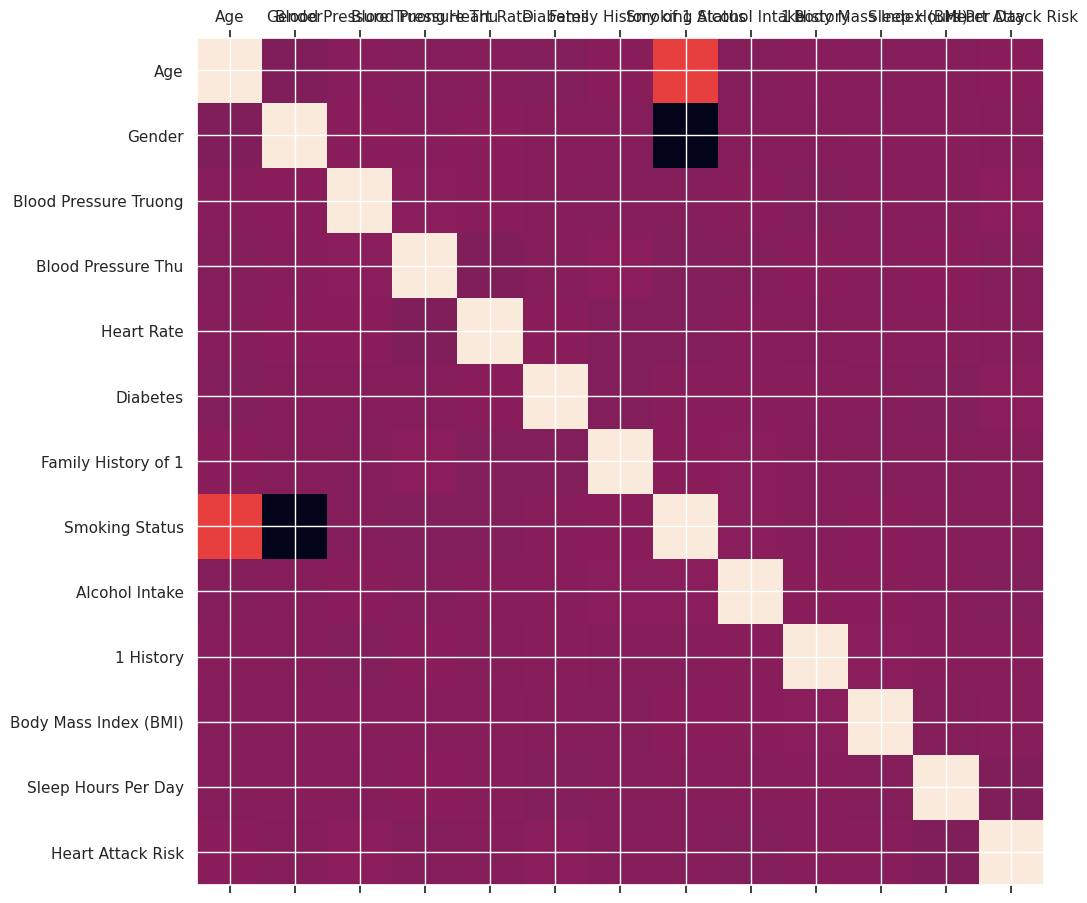

In [7]:
plot_corr(data_frame)

## Mold Data

### Data Types

Inspect data types to see if there are any issues.  Data should be numeric.

In [ ]:
data_frame.head(7)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1


Change diabetes from boolean to integer, True=1, False=0

Verify that the diabetes data type has been changed.

In [ ]:
data_frame.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,NaN
1,54.0,0,0,27.32,6.6,80,NaN
2,28.0,0,0,27.32,5.7,158,NaN
3,36.0,0,0,23.45,5.0,155,NaN
4,76.0,1,1,20.14,4.8,155,NaN


### Check for null values

In [ ]:
data_frame.isnull().values.any()

False

No obvious null values.

### Check class distribution

Rare events are hard to predict

In [37]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Diabetes'] == 1])
num_false = len(data_frame.loc[data_frame['Diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  1200 (28.26%)
Number of False cases: 3047 (71.74%)


Good distribution of true and false cases.  No special work needed.

### Spliting the data

70% for training, 30% for testing

In [38]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Age', 'Gender', 'Blood Pressure Truong', 'Blood Pressure Thu', 'Heart Rate',
                     'Family History of 1', 'Smoking Status', 'Alcohol Intake', '1 History',
                     'Body Mass Index (BMI)', 'Sleep Hours Per Day', 'Heart Attack Risk']
predicted_class_names = ['Diabetes']

X = data_frame[feature_col_names].values     # predictor feature columns (8 X m)
y = data_frame[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.3

#Splitting Data from 2 different Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
                            # test_size = 0.3 is 30%, 42 is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [ ]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

NameError: name 'data_frame1' is not defined

#### Verifying predicted value was split correctly

In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 1]), (len(data_frame.loc[data_frame['diabetes'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 0]), (len(data_frame.loc[data_frame['diabetes'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 20 (8.73%)
Original False : 209 (91.27%)

Training True  : 8 (11.59%)
Training False : 130 (188.41%)

Test True      : 3346 (11.15%)
Test False     : 56675 (188.92%)


### Post-split Data Preparation

#### Hidden Missing Values

In [ ]:
data_frame.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
5,20.0,0,0,27.32,6.6,85,0
6,44.0,0,0,19.31,6.5,200,1
7,79.0,0,0,23.86,5.7,85,0
8,42.0,0,0,33.64,4.8,145,0
9,32.0,0,0,27.32,5.0,100,0


Are these 0 values possible?

How many rows have have unexpected 0 values?

In [ ]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))
print("# rows missing hypertension: {0}".format(len(data_frame.loc[data_frame['hypertension'].isnull()])))
print("# rows missing heart_disease: {0}".format(len(data_frame.loc[data_frame['heart_disease'].isnull()])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing HbA1c_level: {0}".format(len(data_frame.loc[data_frame['HbA1c_level'] == 0])))
print("# rows missing blood_glucose_level: {0}".format(len(data_frame.loc[data_frame['blood_glucose_level'] == 0])))

# rows in dataframe 100000
# rows missing age: 0
# rows missing hypertension: 0
# rows missing heart_disease: 0
# rows missing bmi: 0
# rows missing HbA1c_level: 0
# rows missing blood_glucose_level: 0


## Training Initial Algorithm - Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train.ravel())

filename = 'DiabetesPredictionFinalizedModel.sav'

pickle.dump(nb_model, open(filename, 'wb'))

MultinomialNB()

## Performance on Training Data


In [40]:
# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

In [41]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7123


## Performance on Testing Data

In [42]:
# this returns array of predicted results from test_data
from sklearn.metrics import confusion_matrix
prediction_from_test_data = nb_model.predict(X_test)

NB_accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(NB_accuracy))

Accuracy of our naive bayes model is: 0.7286


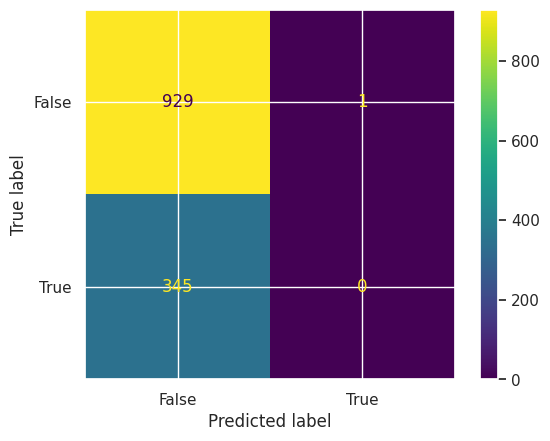

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, prediction_from_test_data)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.46      0.64      0.54      2547
           0       0.97      0.93      0.95     27453

    accuracy                           0.91     30000
   macro avg       0.71      0.78      0.74     30000
weighted avg       0.92      0.91      0.91     30000



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

# Predict Training Data

In [ ]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9974


# Predict Testing Data

In [ ]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.9680


In [ ]:
print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))

Confusion Matrix for Random Forest
[[ 1754   793]
 [  168 27285]]

Classification Report

              precision    recall  f1-score   support

           1       0.91      0.69      0.78      2547
           0       0.97      0.99      0.98     27453

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.88     30000
weighted avg       0.97      0.97      0.97     30000



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

lr_accuracy_test_data = metrics.accuracy_score(y_test, lr_cv_predict_test)

# training metrics
print( "Accuracy: {0:.4f}".format(lr_accuracy_test_data))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]))
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.8867
[[ 2225   322]
 [ 3076 24377]]

Classification Report
              precision    recall  f1-score   support

           1       0.42      0.87      0.57      2547
           0       0.99      0.89      0.93     27453

    accuracy                           0.89     30000
   macro avg       0.70      0.88      0.75     30000
weighted avg       0.94      0.89      0.90     30000



# Support vector Machine

In [ ]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.9607


In [ ]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.9587


In [ ]:
print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[ 1470  1077]
 [  162 27291]]

Classification Report

              precision    recall  f1-score   support

           1       0.90      0.58      0.70      2547
           0       0.96      0.99      0.98     27453

    accuracy                           0.96     30000
   macro avg       0.93      0.79      0.84     30000
weighted avg       0.96      0.96      0.95     30000



In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i], 3), round(y[i],3), ha = 'center')

In [44]:
import numpy as np
import matplotlib.pyplot as plt

Mean_accuracy = (NB_accuracy + rf_accuracy_testdata + svm_accuracy_testdata)/3

data = {'Naive Bayes': NB_accuracy, 'Random Forest':rf_accuracy_testdata, 'SVM':svm_accuracy_testdata, 'Mean': Mean_accuracy}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.6)

addlabels(courses, values)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Cross-model verification")
plt.show()


NameError: ignored